In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

import warnings
import os
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

np.random.seed(42)

In [2]:
from tabulate import tabulate

def show_scores(clf, X, y):
    y_pred = clf.predict(X)
    y_pred_prob = clf.predict_proba(X)
    print(tabulate(confusion_matrix(y, y_pred), headers=['Predicted 0', 'Predicted 1'], tablefmt='orgtbl'))
    print()
    print(f'accuracy:              {round(accuracy_score(y, y_pred), 4)}')
    print(f'precision:             {round(precision_score(y, y_pred), 4)}')
    print(f'recall:                {round(recall_score(y, y_pred), 4)}')
    print(f'f1:                    {round(f1_score(y, y_pred), 4)}')
    print(f'roc_auc:               {round(roc_auc_score(y, y_pred), 4)}')
    print(f'roc_auc_pred_prob:     {round(roc_auc_score(y, y_pred_prob[:, 1]), 4)}')

### Ładowanie zbiorów danych, pierwszy model

In [3]:
X_train = pd.read_csv("../preprocessed_data/X_train.csv")
y_train = pd.read_csv("../preprocessed_data/y_train.csv")

X_val = pd.read_csv("../preprocessed_data/X_val.csv")
y_val = pd.read_csv("../preprocessed_data/y_val.csv")

In [4]:
dct = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

In [5]:
show_scores(dct, X_train, y_train)
show_scores(dct, X_val, y_val)

|   Predicted 0 |   Predicted 1 |
|---------------+---------------|
|         44795 |             0 |
|             0 |          6293 |

accuracy:              1.0
precision:             1.0
recall:                1.0
f1:                    1.0
roc_auc:               1.0
roc_auc_pred_prob:     1.0
|   Predicted 0 |   Predicted 1 |
|---------------+---------------|
|         17015 |          2197 |
|          1797 |           886 |

accuracy:              0.8176
precision:             0.2874
recall:                0.3302
f1:                    0.3073
roc_auc:               0.6079
roc_auc_pred_prob:     0.6079


### Strojenie hiperparametrów

In [6]:
parameters = dict(max_depth=np.arange(1, 100))
depth_search = GridSearchCV(dct, cv=3, scoring='precision', return_train_score=True, param_grid=parameters, n_jobs=-1).fit(X_train, y_train)

In [7]:
depth_search.best_params_

{'max_depth': 2}

In [8]:
res = pd.DataFrame(depth_search.cv_results_).sort_values("mean_test_score", ascending=False)
for mean_score, params in zip(res["mean_test_score"], res["params"]):
    print(round(mean_score, 4), "   ", params)

0.8383     {'max_depth': 2}
0.833     {'max_depth': 6}
0.8302     {'max_depth': 4}
0.8276     {'max_depth': 5}
0.8165     {'max_depth': 7}
0.8075     {'max_depth': 3}
0.7882     {'max_depth': 8}
0.7448     {'max_depth': 9}
0.7185     {'max_depth': 10}
0.706     {'max_depth': 1}
0.6569     {'max_depth': 11}
0.6127     {'max_depth': 12}
0.5598     {'max_depth': 13}
0.5314     {'max_depth': 14}
0.4976     {'max_depth': 15}
0.464     {'max_depth': 16}
0.4378     {'max_depth': 17}
0.4134     {'max_depth': 18}
0.3998     {'max_depth': 19}
0.3776     {'max_depth': 20}
0.3597     {'max_depth': 21}
0.3506     {'max_depth': 22}
0.3397     {'max_depth': 23}
0.3315     {'max_depth': 24}
0.3221     {'max_depth': 26}
0.3217     {'max_depth': 25}
0.3173     {'max_depth': 27}
0.3162     {'max_depth': 28}
0.3114     {'max_depth': 29}
0.3102     {'max_depth': 30}
0.3043     {'max_depth': 31}
0.3002     {'max_depth': 32}
0.2981     {'max_depth': 33}
0.2971     {'max_depth': 34}
0.2969     {'max_depth': 3

In [9]:
show_scores(depth_search.best_estimator_, X_train, y_train)
show_scores(depth_search.best_estimator_, X_val, y_val)

|   Predicted 0 |   Predicted 1 |
|---------------+---------------|
|         44534 |           261 |
|          4945 |          1348 |

accuracy:              0.8981
precision:             0.8378
recall:                0.2142
f1:                    0.3412
roc_auc:               0.6042
roc_auc_pred_prob:     0.7065
|   Predicted 0 |   Predicted 1 |
|---------------+---------------|
|         19089 |           123 |
|          2072 |           611 |

accuracy:              0.8997
precision:             0.8324
recall:                0.2277
f1:                    0.3576
roc_auc:               0.6107
roc_auc_pred_prob:     0.6971


In [29]:
parameters = dict(max_depth=np.arange(1, 65, 3), min_samples_split=np.arange(2, 8),
                  min_samples_leaf=np.arange(1, 20, 2), max_features=np.arange(20, 150, 5))

rand_search = RandomizedSearchCV(dct, scoring='accuracy', cv=3, return_train_score=True, param_distributions=parameters,n_iter=100, n_jobs=-1, random_state=42).fit(X_train, y_train)

In [30]:
best_dct = rand_search.best_estimator_

In [31]:
rand_search.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 11,
 'max_features': 105,
 'max_depth': 4}

In [32]:
res = pd.DataFrame(rand_search.cv_results_).sort_values("mean_test_score", ascending=False)
for mean_score, params in zip(res["mean_test_score"], res["params"]):
    print(round(mean_score, 4), "   ", params)

0.8286     {'min_samples_split': 4, 'min_samples_leaf': 11, 'max_features': 105, 'max_depth': 4}
0.8254     {'min_samples_split': 7, 'min_samples_leaf': 15, 'max_features': 115, 'max_depth': 4}
0.8249     {'min_samples_split': 2, 'min_samples_leaf': 17, 'max_features': 100, 'max_depth': 4}
0.8233     {'min_samples_split': 3, 'min_samples_leaf': 19, 'max_features': 110, 'max_depth': 4}
0.8209     {'min_samples_split': 5, 'min_samples_leaf': 11, 'max_features': 90, 'max_depth': 4}
0.8176     {'min_samples_split': 5, 'min_samples_leaf': 13, 'max_features': 45, 'max_depth': 4}
0.8167     {'min_samples_split': 4, 'min_samples_leaf': 17, 'max_features': 80, 'max_depth': 7}
0.8135     {'min_samples_split': 3, 'min_samples_leaf': 15, 'max_features': 85, 'max_depth': 7}
0.8133     {'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 55, 'max_depth': 7}
0.8119     {'min_samples_split': 7, 'min_samples_leaf': 15, 'max_features': 55, 'max_depth': 4}
0.8088     {'min_samples_split': 6, '

In [28]:
show_scores(best_dct, X_train, y_train)
show_scores(best_dct, X_val, y_val)

|   Predicted 0 |   Predicted 1 |
|---------------+---------------|
|         44511 |           284 |
|          4886 |          1407 |

accuracy:              0.8988
precision:             0.8321
recall:                0.2236
f1:                    0.3525
roc_auc:               0.6086
roc_auc_pred_prob:     0.7322
|   Predicted 0 |   Predicted 1 |
|---------------+---------------|
|         19070 |           142 |
|          2059 |           624 |

accuracy:              0.8995
precision:             0.8146
recall:                0.2326
f1:                    0.3618
roc_auc:               0.6126
roc_auc_pred_prob:     0.7172


### Wizualizacje


In [34]:
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_dct.feature_importances_
}).sort_values('Importance', ascending=False)
importance_df.head(10)

,Feature,Importance
14,WheelType_OTHER,0.725834
87,Auction_MANHEIM,0.096851
3,VehicleAge,0.091370
1,VehBCost,0.033416
4,MMRAcquisitionAuctionAveragePrice,0.014020
8,Year,0.013135
2,WarrantyCost,0.011293
86,Auction_ADESA,0.008147
0,VehOdo,0.002988
7,IsOnlineSale,0.002946


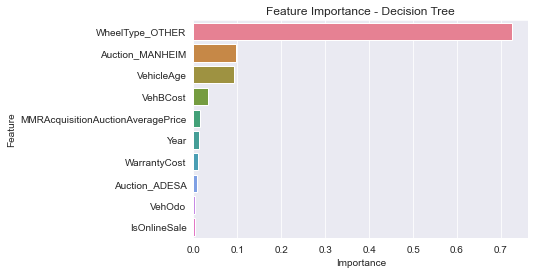

In [35]:
plt.title('Feature Importance - Decision Tree')
sns.barplot(data=importance_df.head(10),palette='husl',x='Importance', y='Feature')
plt.show()

In [17]:
def gini_roc(y_test, y_pred_proba, tytul):

    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    plt.plot(fpr,tpr)
    plt.title(tytul)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    roc_auc = metrics.auc(fpr, tpr)
    gini = (2 * roc_auc) - 1

    return gini

def gini_train_val(model, X_train, y_train, X_val, y_val):

    y_pred_proba = model.predict_proba(X_train)[::,1]
    gini_train = gini_roc(y_train, y_pred_proba, "ROC Curve for Training Sample")
    print("gini_train: %.4f" % gini_train)

    y_pred_proba = model.predict_proba(X_val)[::,1]
    gini_val = gini_roc(y_val, y_pred_proba, "Roc Curve for Validation Sample")
    print("gini_val: %.4f" % gini_val)

    return

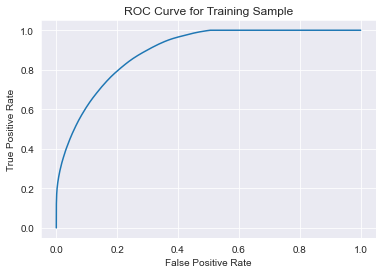

gini_train: 0.7866


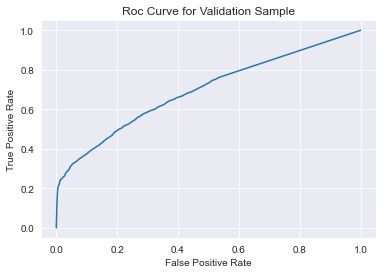

gini_val: 0.3898


In [18]:
gini_train_val(best_dct, X_train, y_train, X_val, y_val)